In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [274]:
postulantes_edu_df = pd.read_csv('Navent/fiuba_1_postulantes_educacion.csv')
postulantes_gye_df = pd.read_csv('Navent/fiuba_2_postulantes_genero_y_edad.csv')
vistas_df = pd.read_csv('Navent/fiuba_3_vistas.csv')
postulaciones_df = pd.read_csv('Navent/fiuba_4_postulaciones.csv')
avisos_online_df = pd.read_csv('Navent/fiuba_5_avisos_online.csv') #No sirve
avisos_detalle_df = pd.read_csv('Navent/fiuba_6_avisos_detalle.csv')

In [275]:
merge_edu_gye_df = postulantes_edu_df.merge(postulantes_gye_df, on = 'idpostulante')
print(merge_edu_gye_df.fechanacimiento.isnull().value_counts())
merge_edu_gye_df.head()

False    294668
True       3563
Name: fechanacimiento, dtype: int64


,idpostulante,nombre,estado,fechanacimiento,sexo
0,NdJl,Posgrado,En Curso,1969-05-09,MASC
1,NdJl,Universitario,Graduado,1969-05-09,MASC
2,8BkL,Universitario,En Curso,1976-07-21,FEM
3,8BkL,Universitario,Graduado,1976-07-21,FEM
4,8BkL,Posgrado,Graduado,1976-07-21,FEM


In [276]:
avisos_detalle_df.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [277]:
postulaciones_df.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [278]:
merge_detalle_postulaciones_df = postulaciones_df.merge(avisos_detalle_df, on = 'idaviso')
merge_detalle_postulaciones_df.head()

,idaviso,idpostulante,fechapostulacion,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,1112257047,NM5M,2018-01-15 16:22:34,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
1,1112257047,1kJqGb,2018-01-15 10:23:11,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
2,1112257047,eOE9Rr,2018-01-15 10:42:07,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
3,1112257047,Zrx8Xz,2018-01-30 10:18:14,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
4,1112257047,ZrKNQY,2018-01-16 17:19:38,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA


In [279]:
merge_detalle_postulaciones_df.count()

idaviso                 3074206
idpostulante            3074206
fechapostulacion        3074206
idpais                  3074206
titulo                  3074206
descripcion             3074206
nombre_zona             3074206
ciudad                    10296
mapacalle                205497
tipo_de_trabajo         3074206
nivel_laboral           3074206
nombre_area             3074206
denominacion_empresa    3073956
dtype: int64

In [280]:
avisos_detalle_df.nivel_laboral.unique()

array(['Senior / Semi-Senior', 'Junior',
       'Jefe / Supervisor / Responsable', 'Otro',
       'Gerencia / Alta Gerencia / Dirección'], dtype=object)

In [281]:
avisos_detalle_df.nivel_laboral.value_counts()

Senior / Semi-Senior                    9407
Junior                                  2216
Otro                                     921
Jefe / Supervisor / Responsable          809
Gerencia / Alta Gerencia / Dirección     181
Name: nivel_laboral, dtype: int64

Text(0,0.5,'Nivel laboral')

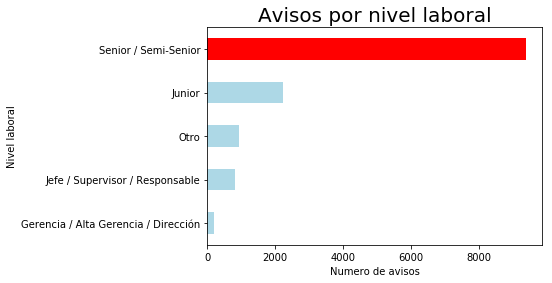

In [282]:
avisos_por_nivel = avisos_detalle_df.nivel_laboral.value_counts(ascending = True).plot(kind = 'barh', color = ['lightblue','lightblue','lightblue','lightblue','red'])
avisos_por_nivel.set_title("Avisos por nivel laboral", fontsize = 20)
avisos_por_nivel.set_xlabel("Numero de avisos")
avisos_por_nivel.set_ylabel("Nivel laboral")

Text(0.5,1,'Postulaciones por nivel laboral')

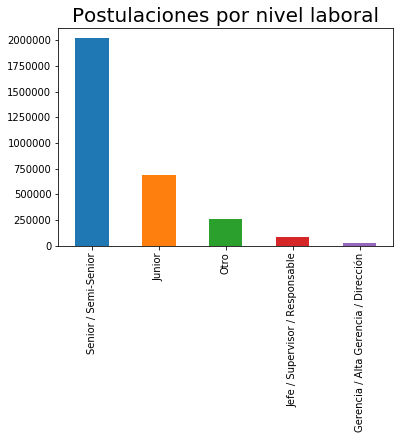

In [283]:
postulaciones_por_nivel = merge_detalle_postulaciones_df.nivel_laboral.value_counts().plot(kind = 'bar')
postulaciones_por_nivel.set_title("Postulaciones por nivel laboral", fontsize = 20)

Text(0.5,1,'Top 10 areas con mas avisos')

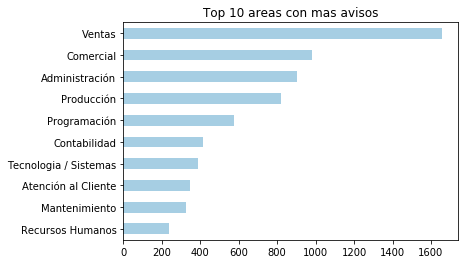

In [284]:
avisos_por_nombre_area = avisos_detalle_df.nombre_area.value_counts().head(10).sort_values().plot(kind = 'barh',colormap='Paired')
avisos_por_nombre_area.set_title("Top 10 areas con mas avisos")

Text(0.5,1,'Top 10 areas con mas postulaciones')

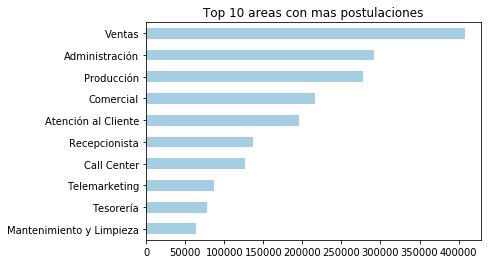

In [285]:
postulaciones_por_nombre_area = merge_detalle_postulaciones_df.nombre_area.value_counts().head(10).sort_values().plot(kind = 'barh',colormap='Paired')
postulaciones_por_nombre_area.set_title("Top 10 areas con mas postulaciones")

In [286]:
#Empiezo a relacionar la cantidad de postulaciones con la cantidad de avisos (por area). CONDICION = MAS DE 50 AVISOS
merge = avisos_detalle_df.nombre_area.value_counts().to_frame().reset_index()
columnas = ['nombre_area','cantidad_avisos']
merge.columns = columnas
merge = merge[(merge.cantidad_avisos) > 200]
merge.head()


,nombre_area,cantidad_avisos
0,Ventas,1659
1,Comercial,983
2,Administración,901
3,Producción,821
4,Programación,576


In [287]:
df = merge_detalle_postulaciones_df.nombre_area.value_counts().to_frame().reset_index()
columnas = ['nombre_area','cantidad_postulaciones']
df.columns = columnas
df.head()

,nombre_area,cantidad_postulaciones
0,Ventas,408148
1,Administración,291135
2,Producción,277089
3,Comercial,216677
4,Atención al Cliente,195636


In [288]:
merge = merge.merge(df, on = 'nombre_area')
merge.head()

,nombre_area,cantidad_avisos,cantidad_postulaciones
0,Ventas,1659,408148
1,Comercial,983,216677
2,Administración,901,291135
3,Producción,821,277089
4,Programación,576,8188


In [289]:
merge['relacion'] = ( merge['cantidad_postulaciones'] ) / (merge['cantidad_avisos'] )
merge.head()

,nombre_area,cantidad_avisos,cantidad_postulaciones,relacion
0,Ventas,1659,408148,246.020494
1,Comercial,983,216677,220.424212
2,Administración,901,291135,323.124306
3,Producción,821,277089,337.501827
4,Programación,576,8188,14.215278


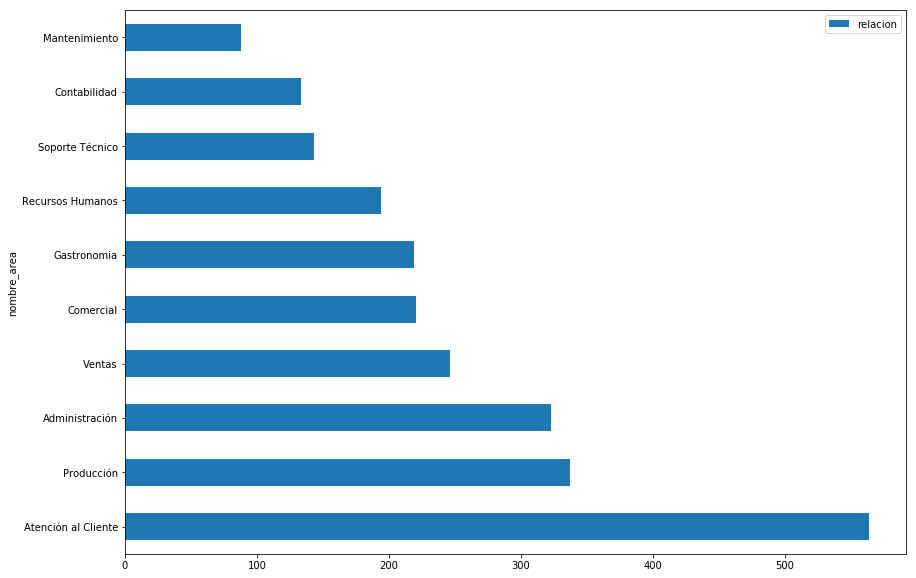

In [290]:
merge.groupby('nombre_area').agg({'relacion' : 'sum'}).sort_values(by = 'relacion',ascending = False).head(10).plot(kind = 'barh',figsize = (14,10))
#Grafico de relacion entre cantidad de postulaciones y cantidad de avisos por nombre de area. Ojo con la cantidad de avisos, ecuacion mas peligrosa de la historia.

Text(0.5,1,'Top 10 Empresas Con Mas Avisos')

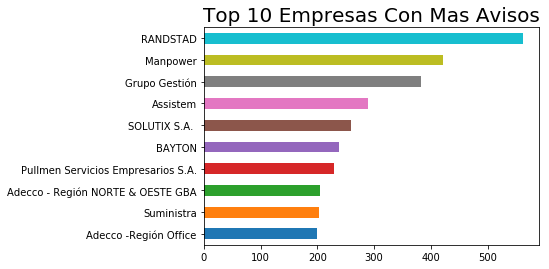

In [291]:
empresas_con_mas_avisos = avisos_detalle_df.denominacion_empresa.value_counts().head(10).sort_values().plot(kind = 'barh')
empresas_con_mas_avisos.set_title("Top 10 Empresas Con Mas Avisos", fontsize = 20)


Text(0.5,1,'Top 10 Empresas Con Mas Postulaciones')

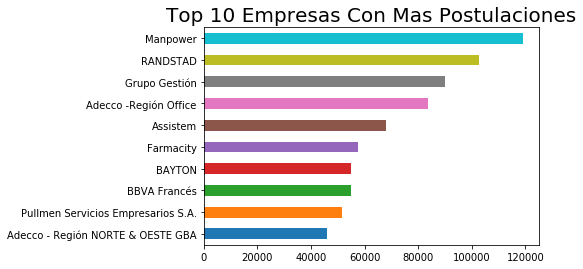

In [292]:
empresas_con_mas_postulaciones = merge_detalle_postulaciones_df.denominacion_empresa.value_counts().head(10).sort_values().plot(kind = 'barh')
empresas_con_mas_postulaciones.set_title("Top 10 Empresas Con Mas Postulaciones", fontsize = 20)

In [293]:
#Ahora veo la relacion entre postulaciones y avisos pero con las empresas.
merge = avisos_detalle_df.denominacion_empresa.value_counts().reset_index()
columnas = ['denominacion_empresa','cantidad_avisos']
merge.columns = columnas
merge = merge[ (merge.cantidad_avisos > 50 ) & (merge.cantidad_avisos < 300) ]
merge.head()

,denominacion_empresa,cantidad_avisos
3,Assistem,289
4,SOLUTIX S.A.,260
5,BAYTON,238
6,Pullmen Servicios Empresarios S.A.,229
7,Adecco - Región NORTE & OESTE GBA,205


In [294]:
df = merge_detalle_postulaciones_df.denominacion_empresa.value_counts().reset_index()
columnas = ['denominacion_empresa','cantidad_postulaciones']
df.columns = columnas
df.head()

,denominacion_empresa,cantidad_postulaciones
0,Manpower,119013
1,RANDSTAD,102640
2,Grupo Gestión,89950
3,Adecco -Región Office,83530
4,Assistem,68125


In [295]:
merge = merge.merge(df, on = 'denominacion_empresa')
merge.head()

,denominacion_empresa,cantidad_avisos,cantidad_postulaciones
0,Assistem,289,68125
1,SOLUTIX S.A.,260,8206
2,BAYTON,238,55048
3,Pullmen Servicios Empresarios S.A.,229,51471
4,Adecco - Región NORTE & OESTE GBA,205,45912


In [296]:
merge['relacion'] = ( merge.cantidad_postulaciones / merge.cantidad_avisos)
merge.head()

,denominacion_empresa,cantidad_avisos,cantidad_postulaciones,relacion
0,Assistem,289,68125,235.726644
1,SOLUTIX S.A.,260,8206,31.561538
2,BAYTON,238,55048,231.294118
3,Pullmen Servicios Empresarios S.A.,229,51471,224.764192
4,Adecco - Región NORTE & OESTE GBA,205,45912,223.960976


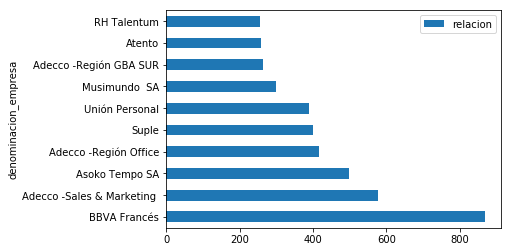

In [297]:
merge.groupby('denominacion_empresa').agg({'relacion' : 'sum'}).sort_values(by = 'relacion', ascending = False).head(10).plot(kind = 'barh')
#Grafico de relacion entre postulaciones y avisos (por empresa)

In [298]:
#NIVEL LABORAL Y EDAD MEDIA DE LOS POSTULANTES

print('Cantidades con valores nulos :')
print(postulantes_gye_df.count())
#Solo la columna 'fechanacimiento' tiene valores nulos, los saco
print('Cantidades sin valores nulos :')
postulantes_gye_df = postulantes_gye_df.dropna()
print(postulantes_gye_df.count())

Cantidades con valores nulos :
idpostulante       200888
fechanacimiento    196138
sexo               200888
dtype: int64
Cantidades sin valores nulos :
idpostulante       196138
fechanacimiento    196138
sexo               196138
dtype: int64


In [299]:
#Hay fechas que no son correctas, las saco.
print('Cantidad original: 196138')
print('')
print('Fechas incorrectas :')
print(postulantes_gye_df[postulantes_gye_df['fechanacimiento'].str.startswith('00')])
print('')
print('Cantidad de fechas incorrectas: ' , postulantes_gye_df[postulantes_gye_df['fechanacimiento'].str.startswith('00')].shape)
postulantes_gye_df = postulantes_gye_df[ (postulantes_gye_df['fechanacimiento'].str.startswith('00')) == False]
print('')
print('Cantidad sin fechas incorrectas : ', postulantes_gye_df.shape)


Cantidad original: 196138

Fechas incorrectas :
       idpostulante fechanacimiento        sexo
56206       xkPwXwY      0031-12-11         FEM
71458       LN85Y3b      0029-05-11        MASC
130846      8M2R6pz      0024-02-09         FEM
141832      A36Npjj      0033-09-14         FEM
145683      dYjV0rb      0012-11-04  NO_DECLARA
148638      GNZOvAv      0004-07-19        MASC
149653      1QPQ8QL      0011-03-08        MASC

Cantidad de fechas incorrectas:  (7, 3)

Cantidad sin fechas incorrectas :  (196131, 3)


In [300]:
#Ahora sin las fechas incorrectas, puedo calcular la edad promedio.
postulantes_gye_df.fechanacimiento = pd.to_datetime(postulantes_gye_df.fechanacimiento)
postulantes_gye_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196131 entries, 0 to 200886
Data columns (total 3 columns):
idpostulante       196131 non-null object
fechanacimiento    196131 non-null datetime64[ns]
sexo               196131 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 6.0+ MB


In [301]:
postulantes_gye_df['edad'] = (2018 - postulantes_gye_df.fechanacimiento.dt.year)
postulantes_gye_df.head()

,idpostulante,fechanacimiento,sexo,edad
0,NM5M,1970-12-03,FEM,48
1,5awk,1962-12-04,FEM,56
2,ZaO5,1978-08-10,FEM,40
3,NdJl,1969-05-09,MASC,49
4,eo2p,1981-02-16,MASC,37


In [302]:
#Hay postulantes con mas de 100 años, tambien los saco
print('Postualantes con edad trucha: ')
print(postulantes_gye_df[ ( postulantes_gye_df['edad'] > 80) | (postulantes_gye_df['edad'] < 18) ])

postulantes_gye_df = postulantes_gye_df[ ( (postulantes_gye_df['edad'] > 80) | (postulantes_gye_df['edad'] < 18) ) == False ]



Postualantes con edad trucha: 
       idpostulante fechanacimiento  sexo  edad
6869         a5qWAm      2006-01-01  MASC    12
154559      xkdvwm0      1775-07-09  MASC   243
156483      4rP8l0R      1921-08-18   FEM    97
164618      96X1loa      1917-07-08  MASC   101


Text(0.5,1,'Postulantes por edad')

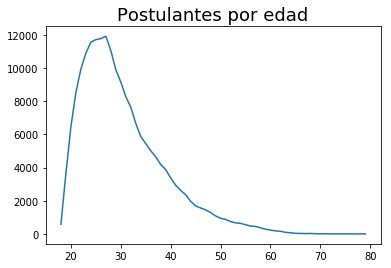

In [310]:
postulantes_gye_df.edad.value_counts().sort_index().plot(kind = 'line').set_title('Postulantes por edad', fontsize=18)

In [313]:
#Ahora junto la informacion de las edades con el data frame de postulaciones-avisos.
merge = merge_detalle_postulaciones_df.merge(postulantes_gye_df, on = 'idpostulante')
merge.head()
print(merge.shape)

(3034428, 16)


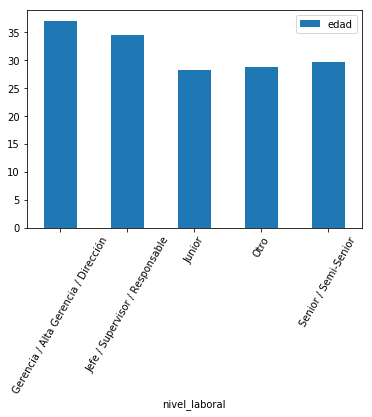

In [327]:
merge.groupby('nivel_laboral').agg({'edad':'mean'}).plot(kind = 'bar',rot = 60)